In [1]:
from tensorflow.keras import models, optimizers, losses
from tensorflow.keras.utils import Progbar
from utils import *
from network import *
from matplotlib import pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
G = generator(model='dense', case=2)

print("\n===================================\n")

D = discriminator(model='dense', case=1)

=========== Information about Backbone ===========
Loading DenseNet121 model
Total Parameter of Model :  7,037,504
Trainable Parameter of Model :  6,953,856
Non-Trainable Parameter of Model :  83,648

=========== Information about Whole Network ===========
Total Parameter of Model :  25,880,454
Trainable Parameter of Model :  25,796,806
Non-Trainable Parameter of Model :  83,648


=========== Information about Backbone ===========
Loading DenseNet121 model


C:\Users\user\Anaconda3\lib\site-packages\keras_applications\imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 6 input channels.
  str(input_shape[-1]) + ' input channels.')


Total Parameter of Model :  7,046,912
Trainable Parameter of Model :  6,963,264
Non-Trainable Parameter of Model :  83,648

=========== Information about Whole Network ===========
Total Parameter of Model :  16,486,145
Trainable Parameter of Model :  16,402,497
Non-Trainable Parameter of Model :  83,648


In [3]:
def Gen2Dis(gen, dis, case=1):
    if case==2:
        dis_out, texture = dis(gen.output)
        net = models.Model(inputs=gen.input, outputs=[gen.output, dis_out])
    elif case==3:
        dis_out = dis(gen.output)
        net = models.Model(inputs=gen.input, outputs=[gen.output, dis_out])
    else:
        dis_out = dis(gen.output[0])
        net = models.Model(inputs=gen.input, outputs=[gen.output[0], dis_out])
    
    return net

In [4]:
D.trainable=False
A = Gen2Dis(G, D, case=3)
A.compile(optimizer=optimizers.Adam(lr=0.0001, epsilon=1e-8), loss=[losses.mean_squared_error, losses.binary_crossentropy], loss_weights=[50, 1])

D.trainable=True
D.compile(optimizer=optimizers.Adam(lr=0.0001, epsilon=1e-8), loss=losses.binary_crossentropy)

In [5]:
train_low, train_high, val_low, val_high, test_low = data_loader_v2('../MRI Enhancing/4gan_m')
print("Train X's shape : ", train_low.shape)
print("Train Y's shape : ", train_high.shape)
print("Validation X's shape : ", val_low.shape)
print("Validation Y's shape : ", val_high.shape)
print("Test X's shape : ", test_low.shape)

Train X's shape :  (303, 320, 256, 3)
Train Y's shape :  (316, 320, 256, 6)
Validation X's shape :  (25, 320, 256, 3)
Validation Y's shape :  (26, 320, 256, 6)
Test X's shape :  (328, 320, 256, 3)


In [6]:
shuffle_idx = np.random.choice(len(train_low), len(train_low), replace=False)
train_low = train_low[shuffle_idx]
train_high = train_high[shuffle_idx]
batch = 8
steps = len(train_low)//batch +1

Epochs : 001/1500
40/40 [==============================] - 112s 3s/step - Epochs: 1.0000 - G_Style: 1677797.6922 - G_Dis: 33555.8990 - D_Dis: 0.0949
Epochs : 002/1500
40/40 [==============================] - 27s 685ms/step - Epochs: 2.0000 - G_Style: 942112.2391 - G_Dis: 18842.2016 - D_Dis: 5.7284e-04
Epochs : 003/1500
40/40 [==============================] - 27s 675ms/step - Epochs: 3.0000 - G_Style: 726644.7906 - G_Dis: 14532.8504 - D_Dis: 6.8798e-05
Epochs : 004/1500
40/40 [==============================] - 27s 680ms/step - Epochs: 4.0000 - G_Style: 568554.1969 - G_Dis: 11371.0406 - D_Dis: 2.8189e-04
Epochs : 005/1500
40/40 [==============================] - 27s 679ms/step - Epochs: 5.0000 - G_Style: 467591.9766 - G_Dis: 9351.7898 - D_Dis: 1.3115e-04
Epochs : 006/1500
40/40 [==============================] - 27s 676ms/step - Epochs: 6.0000 - G_Style: 410693.1125 - G_Dis: 8213.8034 - D_Dis: 1.9326e-04
Epochs : 007/1500
40/40 [==============================] - 27s 677ms/step - Epochs:

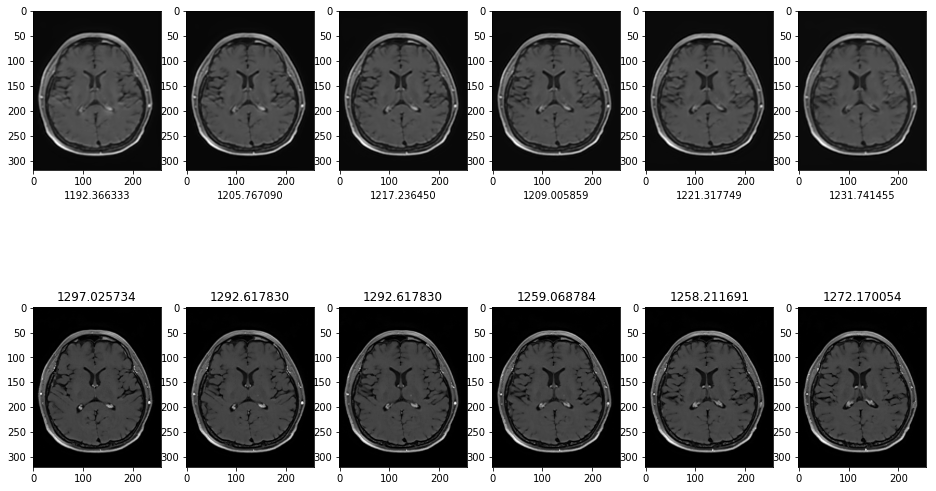

Epochs : 151/1500
40/40 [==============================] - 27s 664ms/step - Epochs: 151.0000 - G_Style: 90761.1558 - G_Dis: 1815.1291 - D_Dis: 1.2994e-04
Epochs : 152/1500
40/40 [==============================] - 27s 665ms/step - Epochs: 152.0000 - G_Style: 87037.1833 - G_Dis: 1740.6493 - D_Dis: 7.5427e-05
Epochs : 153/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 153.0000 - G_Style: 87310.8818 - G_Dis: 1746.1197 - D_Dis: 5.4617e-05
Epochs : 154/1500
40/40 [==============================] - 27s 665ms/step - Epochs: 154.0000 - G_Style: 87176.5693 - G_Dis: 1743.4311 - D_Dis: 7.7612e-05
Epochs : 155/1500
40/40 [==============================] - 27s 665ms/step - Epochs: 155.0000 - G_Style: 86160.9114 - G_Dis: 1723.1177 - D_Dis: 4.6243e-05
Epochs : 156/1500
40/40 [==============================] - 27s 665ms/step - Epochs: 156.0000 - G_Style: 89776.0980 - G_Dis: 1795.4178 - D_Dis: 3.9054e-05
Epochs : 157/1500
40/40 [==============================] - 27s 665ms/step - 

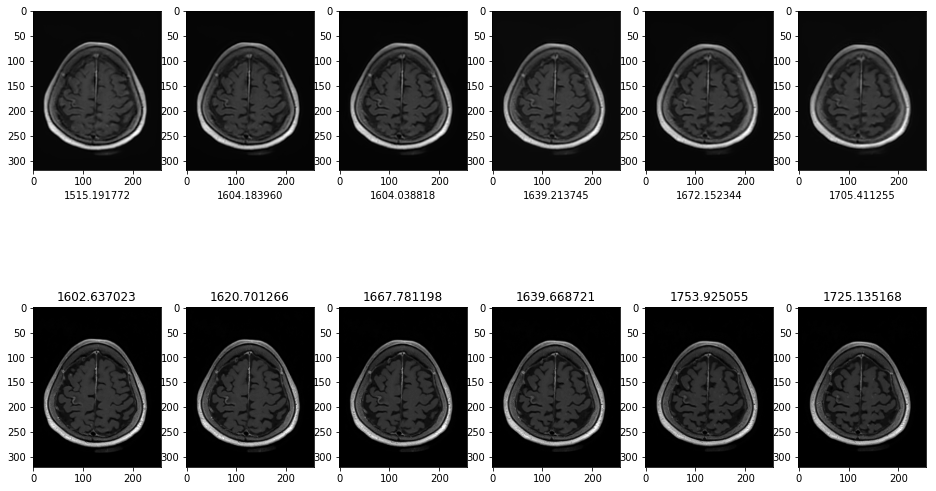

Epochs : 301/1500
40/40 [==============================] - 27s 675ms/step - Epochs: 301.0000 - G_Style: 55004.8266 - G_Dis: 1099.9649 - D_Dis: 1.3320e-05
Epochs : 302/1500
40/40 [==============================] - 27s 673ms/step - Epochs: 302.0000 - G_Style: 56224.4645 - G_Dis: 1124.3538 - D_Dis: 1.8912e-05
Epochs : 303/1500
40/40 [==============================] - 27s 667ms/step - Epochs: 303.0000 - G_Style: 58227.0719 - G_Dis: 1164.4026 - D_Dis: 4.2443e-06
Epochs : 304/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 304.0000 - G_Style: 57201.7419 - G_Dis: 1143.8913 - D_Dis: 4.6169e-06
Epochs : 305/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 305.0000 - G_Style: 56361.6778 - G_Dis: 1127.0887 - D_Dis: 8.0904e-06
Epochs : 306/1500
40/40 [==============================] - 27s 667ms/step - Epochs: 306.0000 - G_Style: 57425.1592 - G_Dis: 1148.3559 - D_Dis: 1.5857e-06
Epochs : 307/1500
40/40 [==============================] - 27s 666ms/step - 

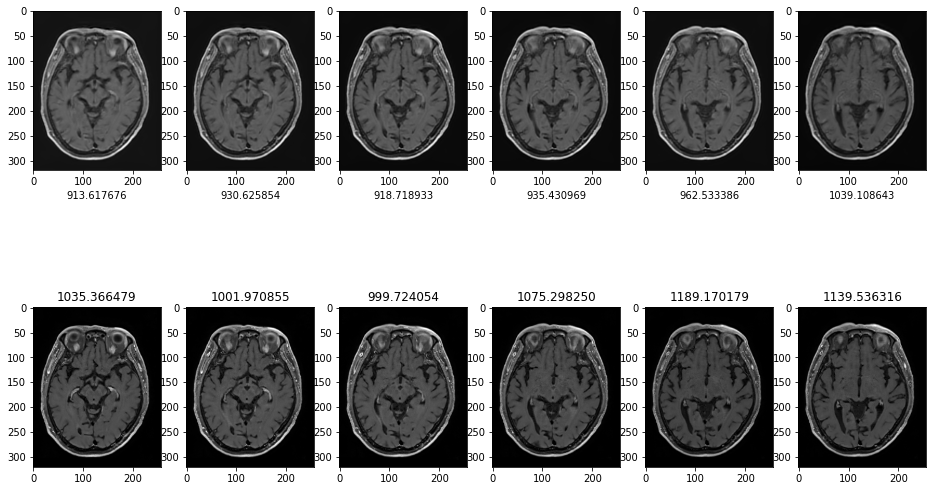

Epochs : 451/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 451.0000 - G_Style: 42125.8795 - G_Dis: 842.3855 - D_Dis: 4.9444e-06
Epochs : 452/1500
40/40 [==============================] - 27s 668ms/step - Epochs: 452.0000 - G_Style: 42066.9134 - G_Dis: 841.2136 - D_Dis: 1.0423e-05
Epochs : 453/1500
40/40 [==============================] - 27s 667ms/step - Epochs: 453.0000 - G_Style: 42280.3477 - G_Dis: 845.4845 - D_Dis: 1.6752e-05
Epochs : 454/1500
40/40 [==============================] - 27s 670ms/step - Epochs: 454.0000 - G_Style: 44131.7959 - G_Dis: 882.5160 - D_Dis: 3.5948e-06
Epochs : 455/1500
40/40 [==============================] - 27s 668ms/step - Epochs: 455.0000 - G_Style: 45792.8812 - G_Dis: 915.7328 - D_Dis: 1.3246e-05
Epochs : 456/1500
40/40 [==============================] - 27s 668ms/step - Epochs: 456.0000 - G_Style: 47101.9535 - G_Dis: 941.9179 - D_Dis: 1.8029e-05
Epochs : 457/1500
40/40 [==============================] - 27s 669ms/step - Epochs

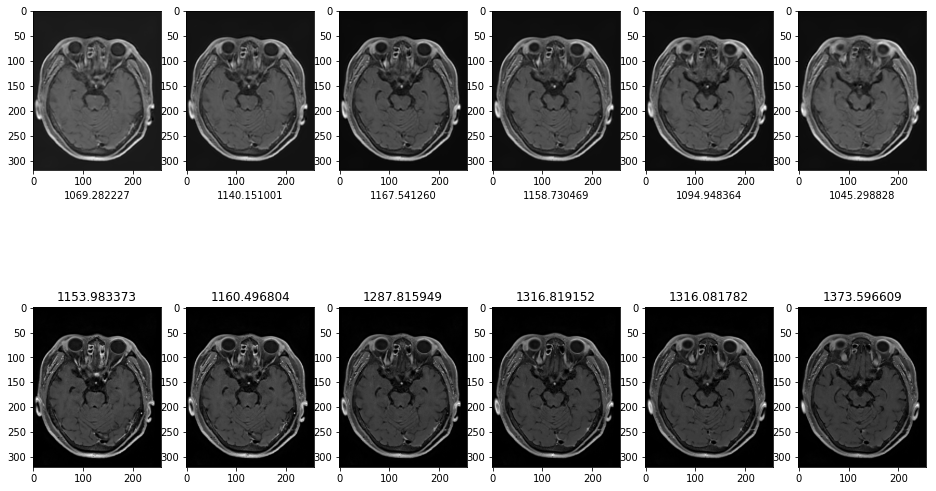

Epochs : 601/1500
40/40 [==============================] - 27s 667ms/step - Epochs: 601.0000 - G_Style: 35610.3558 - G_Dis: 712.0559 - D_Dis: 2.7289e-07
Epochs : 602/1500
40/40 [==============================] - 27s 667ms/step - Epochs: 602.0000 - G_Style: 36811.9000 - G_Dis: 736.0922 - D_Dis: 1.0496e-06
Epochs : 603/1500
40/40 [==============================] - 27s 667ms/step - Epochs: 603.0000 - G_Style: 37423.7980 - G_Dis: 748.3366 - D_Dis: 2.0676e-07
Epochs : 604/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 604.0000 - G_Style: 38300.0223 - G_Dis: 765.8611 - D_Dis: 1.6389e-07
Epochs : 605/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 605.0000 - G_Style: 39625.6028 - G_Dis: 792.3716 - D_Dis: 1.5025e-07
Epochs : 606/1500
40/40 [==============================] - 27s 667ms/step - Epochs: 606.0000 - G_Style: 38402.2527 - G_Dis: 767.9006 - D_Dis: 1.3811e-07
Epochs : 607/1500
40/40 [==============================] - 27s 666ms/step - Epochs

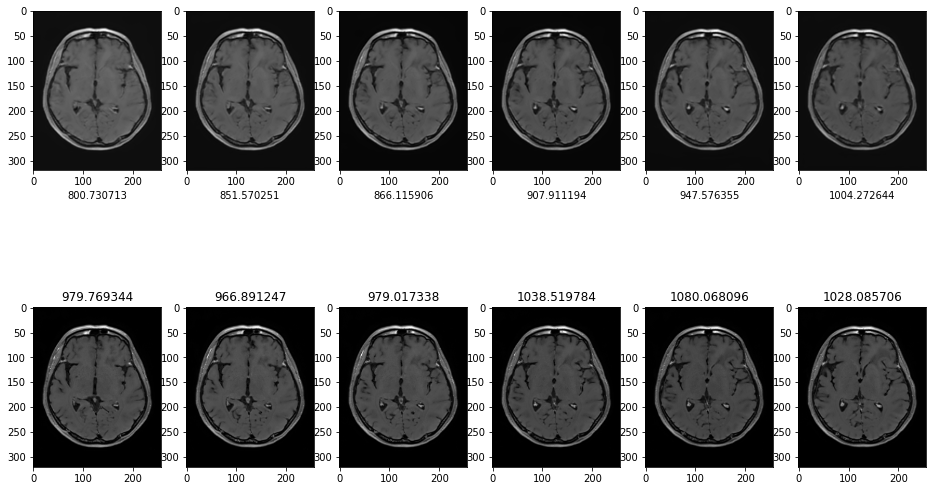

Epochs : 751/1500
40/40 [==============================] - 27s 665ms/step - Epochs: 751.0000 - G_Style: 32926.2966 - G_Dis: 658.3898 - D_Dis: 1.5989e-05
Epochs : 752/1500
40/40 [==============================] - 27s 665ms/step - Epochs: 752.0000 - G_Style: 31738.0371 - G_Dis: 634.6298 - D_Dis: 1.0453e-04
Epochs : 753/1500
40/40 [==============================] - 27s 665ms/step - Epochs: 753.0000 - G_Style: 30495.6363 - G_Dis: 609.7762 - D_Dis: 2.2190e-04
Epochs : 754/1500
40/40 [==============================] - 27s 664ms/step - Epochs: 754.0000 - G_Style: 29297.5578 - G_Dis: 585.8139 - D_Dis: 7.0514e-05
Epochs : 755/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 755.0000 - G_Style: 28608.1627 - G_Dis: 572.0259 - D_Dis: 2.1846e-05
Epochs : 756/1500
40/40 [==============================] - 27s 665ms/step - Epochs: 756.0000 - G_Style: 28618.3541 - G_Dis: 572.2278 - D_Dis: 2.8818e-05
Epochs : 757/1500
40/40 [==============================] - 27s 665ms/step - Epochs

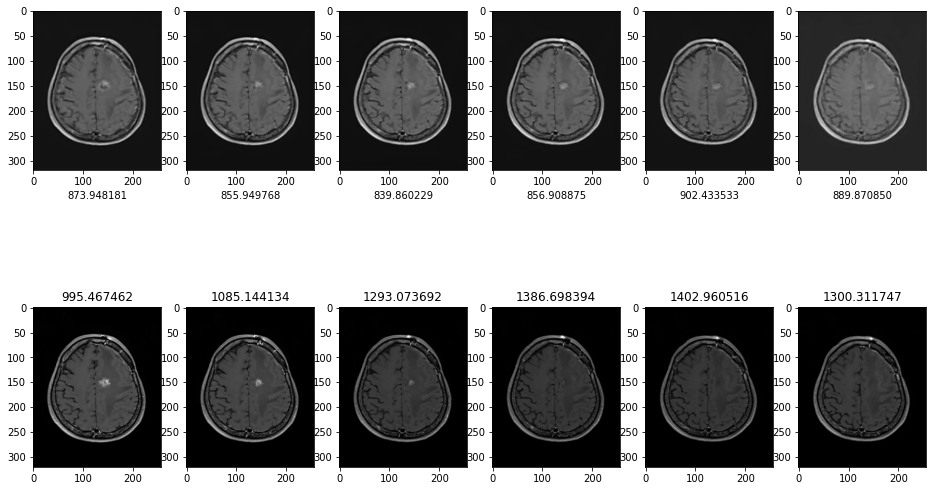

Epochs : 901/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 901.0000 - G_Style: 29240.9540 - G_Dis: 584.6800 - D_Dis: 9.4922e-05
Epochs : 902/1500
40/40 [==============================] - 27s 670ms/step - Epochs: 902.0000 - G_Style: 27422.5241 - G_Dis: 548.3189 - D_Dis: 2.3969e-04
Epochs : 903/1500
40/40 [==============================] - 27s 669ms/step - Epochs: 903.0000 - G_Style: 26031.3872 - G_Dis: 520.4945 - D_Dis: 3.0482e-04
Epochs : 904/1500
40/40 [==============================] - 27s 670ms/step - Epochs: 904.0000 - G_Style: 24795.9422 - G_Dis: 495.7844 - D_Dis: 2.1697e-04
Epochs : 905/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 905.0000 - G_Style: 24070.6919 - G_Dis: 481.2826 - D_Dis: 2.0612e-04
Epochs : 906/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 906.0000 - G_Style: 24008.9586 - G_Dis: 480.0480 - D_Dis: 9.6368e-05
Epochs : 907/1500
40/40 [==============================] - 27s 666ms/step - Epochs

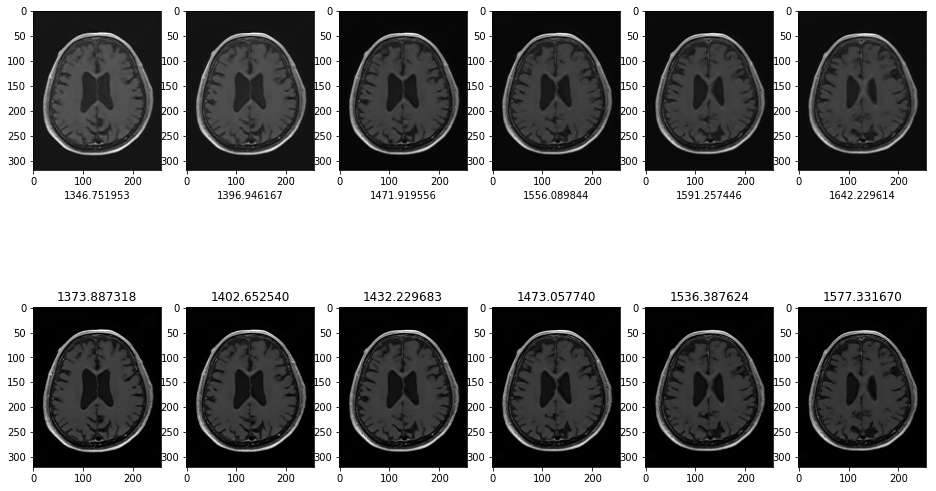

Epochs : 1051/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 1051.0000 - G_Style: 22291.2913 - G_Dis: 445.7153 - D_Dis: 1.1079e-05
Epochs : 1052/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 1052.0000 - G_Style: 22154.6657 - G_Dis: 442.9833 - D_Dis: 1.0395e-05
Epochs : 1053/1500
40/40 [==============================] - 27s 665ms/step - Epochs: 1053.0000 - G_Style: 22268.8147 - G_Dis: 445.2661 - D_Dis: 7.0933e-06
Epochs : 1054/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 1054.0000 - G_Style: 22772.1397 - G_Dis: 455.3303 - D_Dis: 7.2287e-06
Epochs : 1055/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 1055.0000 - G_Style: 22473.8753 - G_Dis: 449.3649 - D_Dis: 9.5507e-06
Epochs : 1056/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 1056.0000 - G_Style: 23075.4645 - G_Dis: 461.3941 - D_Dis: 6.2392e-06
Epochs : 1057/1500
40/40 [==============================] - 27s 665ms/

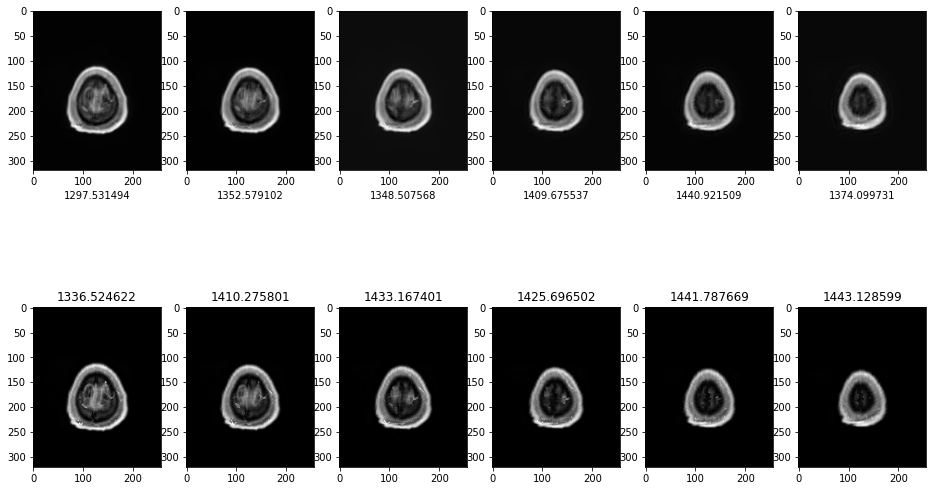

Epochs : 1201/1500
40/40 [==============================] - 27s 665ms/step - Epochs: 1201.0000 - G_Style: 21275.5562 - G_Dis: 425.4172 - D_Dis: 4.6139e-05
Epochs : 1202/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 1202.0000 - G_Style: 21944.7481 - G_Dis: 438.8001 - D_Dis: 5.1253e-05
Epochs : 1203/1500
40/40 [==============================] - 27s 665ms/step - Epochs: 1203.0000 - G_Style: 21487.0497 - G_Dis: 429.6455 - D_Dis: 2.0448e-05
Epochs : 1204/1500
40/40 [==============================] - 27s 667ms/step - Epochs: 1204.0000 - G_Style: 22519.7622 - G_Dis: 450.2993 - D_Dis: 3.3112e-05
Epochs : 1205/1500
40/40 [==============================] - 27s 667ms/step - Epochs: 1205.0000 - G_Style: 21962.3165 - G_Dis: 439.1475 - D_Dis: 1.3669e-05
Epochs : 1206/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 1206.0000 - G_Style: 21498.9295 - G_Dis: 429.8795 - D_Dis: 1.0030e-05
Epochs : 1207/1500
40/40 [==============================] - 27s 666ms/

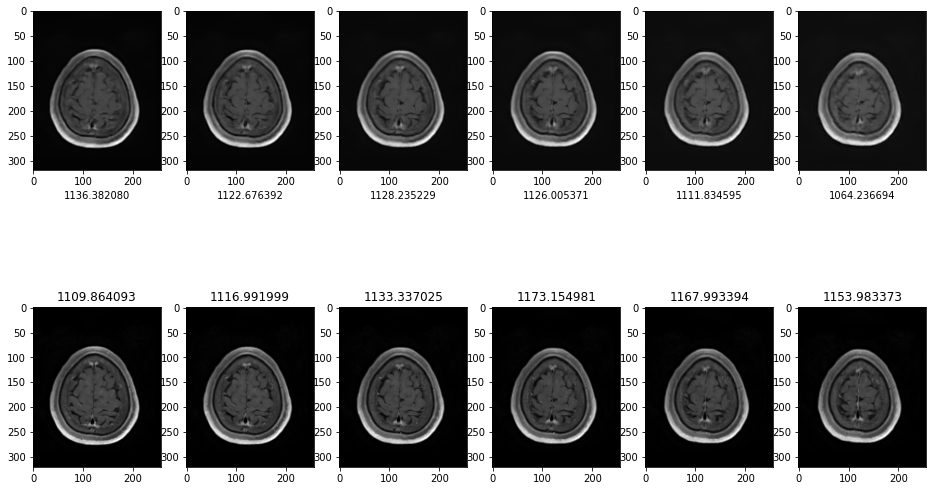

Epochs : 1351/1500
40/40 [==============================] - 27s 667ms/step - Epochs: 1351.0000 - G_Style: 18820.8363 - G_Dis: 376.3042 - D_Dis: 4.1704e-07
Epochs : 1352/1500
40/40 [==============================] - 27s 665ms/step - Epochs: 1352.0000 - G_Style: 18628.2851 - G_Dis: 372.4529 - D_Dis: 6.8192e-07
Epochs : 1353/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 1353.0000 - G_Style: 18390.5627 - G_Dis: 367.6982 - D_Dis: 5.9771e-07
Epochs : 1354/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 1354.0000 - G_Style: 18230.7549 - G_Dis: 364.4988 - D_Dis: 4.2545e-07
Epochs : 1355/1500
40/40 [==============================] - 27s 667ms/step - Epochs: 1355.0000 - G_Style: 18641.2889 - G_Dis: 372.7083 - D_Dis: 3.9799e-07
Epochs : 1356/1500
40/40 [==============================] - 27s 666ms/step - Epochs: 1356.0000 - G_Style: 18610.8414 - G_Dis: 372.1006 - D_Dis: 5.4816e-07
Epochs : 1357/1500
40/40 [==============================] - 27s 667ms/

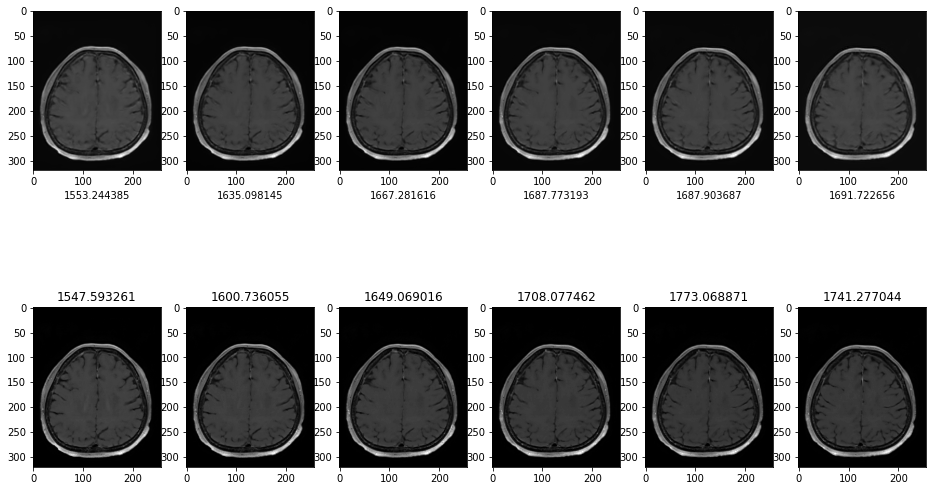

In [8]:
epochs = 1500
#total_progbar = Progbar(epochs)
for epoch in range(epochs):
    print("Epochs : %03d/%03d"%(epoch+1, epochs))
    epoch_g_style = 0
    epoch_g_dis = 0
    epoch_d_dis = 0
    epoch_progbar = Progbar(steps)
    for step in range(steps):
        
        idx = step*batch
        
        if step+1 == steps:
            step_train_low = train_low[idx:]
            step_train_high = train_high[idx:]
        else:
            step_train_low = train_low[idx:idx+4]
            step_train_high = train_high[idx:idx+4]
            
        train_gen_label = np.ones([len(step_train_low), 1], dtype='float')
        train_dis_label = np.zeros([len(step_train_low)*2, 1])
        train_dis_label[len(step_train_low):] = 1.
        
        D.trainable=False
        
        G_Loss = A.train_on_batch(step_train_low, [step_train_high, train_gen_label])
        G_output, _= A.predict(step_train_low)
        
        D.trainable=True
        train_dis_input = np.concatenate([step_train_high, G_output], 0)
        D_Loss = D.train_on_batch(train_dis_input, train_dis_label)
        
        epoch_g_style += G_Loss[0]
        epoch_g_dis +=G_Loss[1]
        
        epoch_d_dis +=D_Loss
        
        epoch_progbar.update(step+1, [("Epochs", epoch+1), ("G_Style", G_Loss[0]), ("G_Dis", G_Loss[1]), ("D_Dis", D_Loss)])
    if (epoch+1)%100 == 0:
        A.save('./checkpoint/3to6/dense/L2/%04d_%.2f.h5'%(epoch+1, epoch_g_style/steps))
    if (epoch+1)%150 == 0:
        ran_idx = np.random.choice(len(train_low)-1, 1)
        test_in = train_low[ran_idx[0]:ran_idx[0]+1]
        test, _ = A.predict(test_in)
        print(test_in.max())

        plot_fn(test, train_high[ran_idx[0]:ran_idx[0]+1])
    #total_progbar.update(epoch+1, [("G_Style", epoch_g_style/steps), ("G_Texture", epoch_g_texture/steps), ("G_Dis", epoch_g_dis/steps), ("D_Texture", epoch_d_texture/steps), ("D_Dis", epoch_d_dis/steps)])

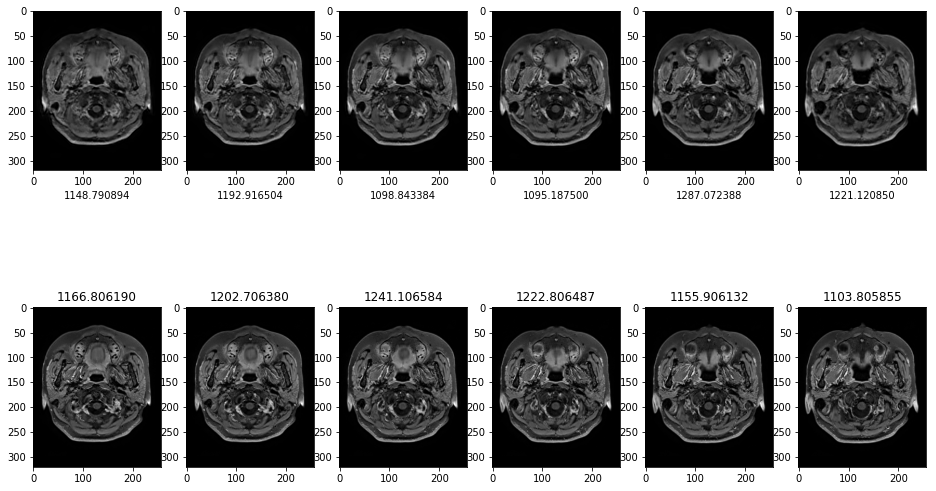

In [82]:
idx = 1
plot_fn(val[idx:idx+1], val_high[idx:idx+1])

1160.1319863076012


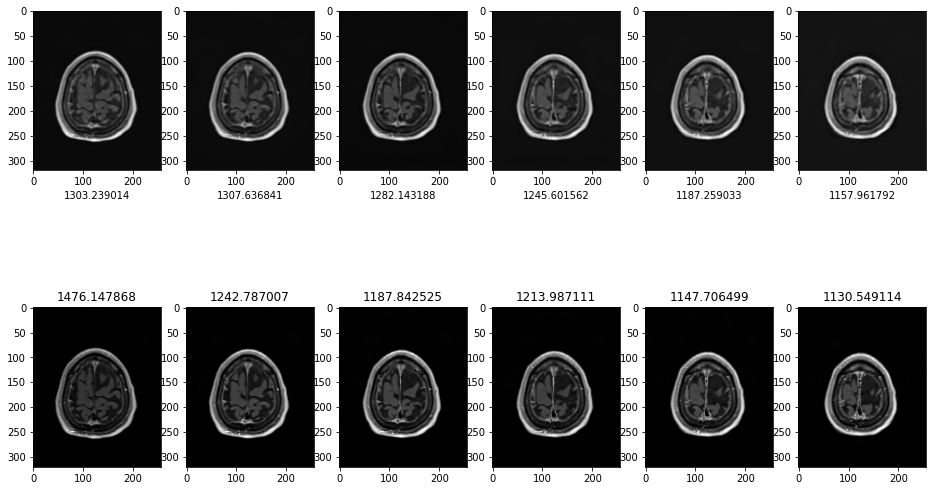

In [9]:
idx = 10
test_in = train_low[idx:idx+1]
test, _ = A.predict(test_in)
print(test_in.max())

plot_fn(test, train_high[idx:idx+1])

In [92]:
train, _ = A.predict(train_low)
train_mse = MSE(train, train_high)

print(train_mse.mean())

In [18]:
idx = 0
val_in = val_low
val, _ = A.predict(test_in)
#print(test_in.max())
print(val.shape)
print(val_high.shape)
#plot_fn(test, val_high[idx:idx+1])
to_save_val = np.transpose(val, [0, 3, 1, 2]).reshape((156, 320, 256))
to_save_label = np.transpose(val_high, [0, 3, 1, 2]).reshape((156, 320, 256))
val_mse = MSE(val, val_high)
print(val_mse.mean())

(26, 320, 256, 6)
(26, 320, 256, 6)


In [27]:
test_in = test_low
test, _ = A.predict(test_in)
#print(test_in.max())
print(test.shape)
#plot_fn(test, val_high[idx:idx+1])
to_save_test = np.transpose(test, [0, 3, 1, 2]).reshape((len(test)*6, 320, 256))
np.save("./result/base_dense/total", to_save_test)

(342, 320, 256, 6)


In [71]:
def plot_fn_single(img):
    mdx = len(img)-1
    def plot(idx=0):
        plt.imshow(img[idx], cmap='gray', vmin=0, vmax=img.max())
        plt.xlabel("%f ~ %f"%(img[idx].min(), img[idx].max()))
    interact(plot, idx=(0, mdx, 1))

In [72]:
plot_fn_single(to_save_test)

interactive(children=(IntSlider(value=0, description='idx', max=2051), Output()), _dom_classes=('widget-intera…

In [38]:
def view_data(img):
    plt.figure(figsize=(16, 10))
    plt.subplot(131)
    plt.imshow(img[...,0], cmap='gray')
    plt.xlabel("%f ~ %f"%(img[...,0].min(), img[...,0].max()))
    plt.subplot(132)
    plt.imshow(img[...,1], cmap='gray')
    plt.xlabel("%f ~ %f"%(img[...,1].min(), img[...,1].max()))
    plt.subplot(133)
    plt.imshow(img[...,2], cmap='gray')
    plt.xlabel("%f ~ %f"%(img[...,2].min(), img[...,2].max()))
    plt.show()

In [ ]:
def plot_fn(pred, label, mode='val'):
#     if mode != 'test':
        
    plt.figure(figsize=(16, 10))
    for i in range(6):
        plt.subplot(2, 6, i+1)
        plt.xlabel("%f"%(pred[0,...,i].max()))
        plt.imshow(pred[0,...,i], cmap='gray', vmin = 0, vmax = label.max())
        plt.subplot(2, 6, i+1+6)
        plt.title("%f"%(label[0,...,i].max()))
        plt.imshow(label[0,...,i], cmap='gray', vmin = 0, vmax = label.max())
    plt.show()

In [83]:
def MSE(x, y):
    """
    x, y : (batch, height, width, channel)
    """
    return np.mean(np.square(x-y), axis=(1, 2))

# def PSNR(x, y):
#     """
#     x, y : (batch, height, width, channel)
#     """
#     return 
# def SSIM(x, y):
#     """
#     x, y : (batch, height, width, channel)
#     """
#     I_xy = 2*np.mean(x, axis=(1, 2))*np.mean(y, axis=(1, 2))